<a href="https://colab.research.google.com/github/Sri200522/credit-card-prediction/blob/main/credit_card_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


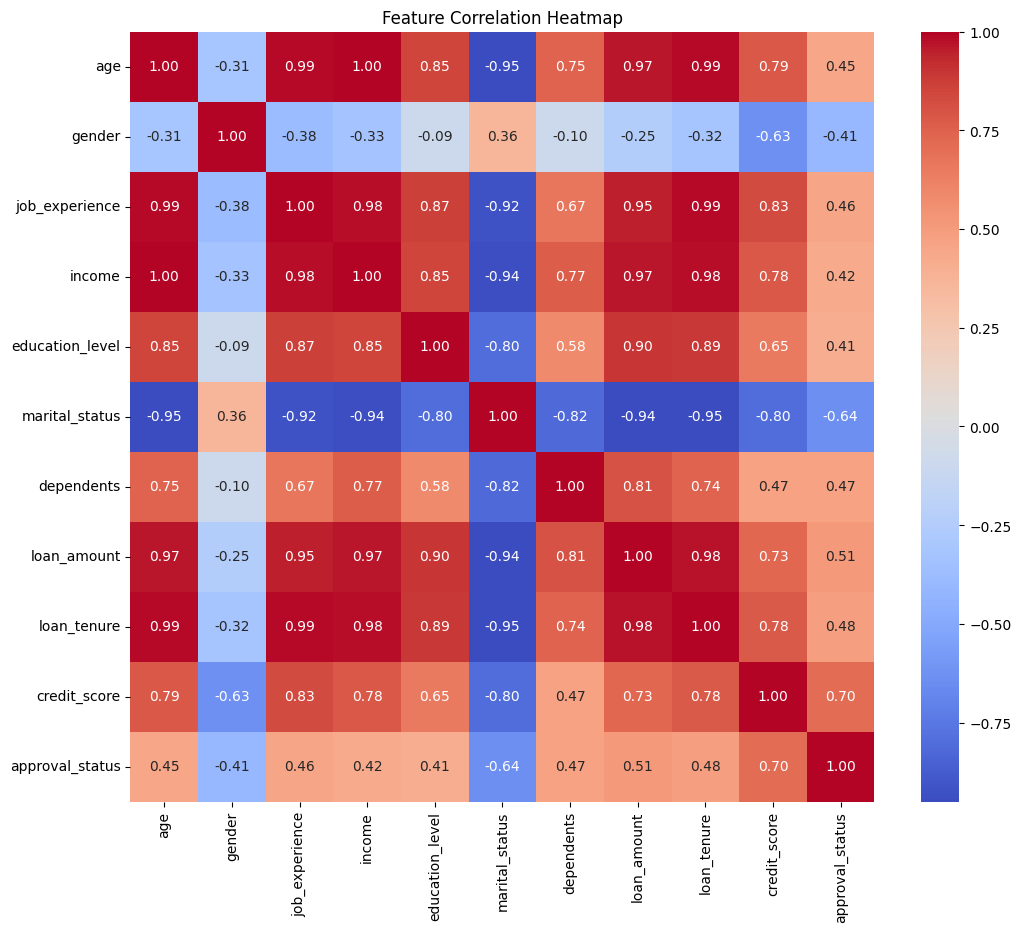

Class distribution before SMOTE: Counter({1: 6, 0: 4})


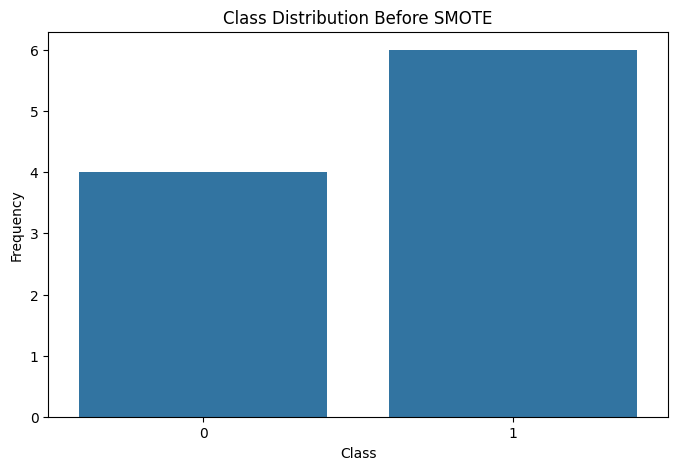

Class distribution after SMOTE: Counter({1: 6, 0: 6})


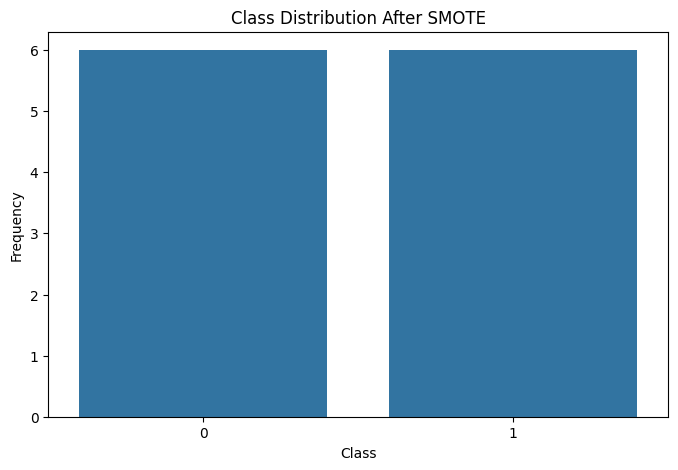

Random Forest Accuracy: 0.6666666666666666
Random Forest ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


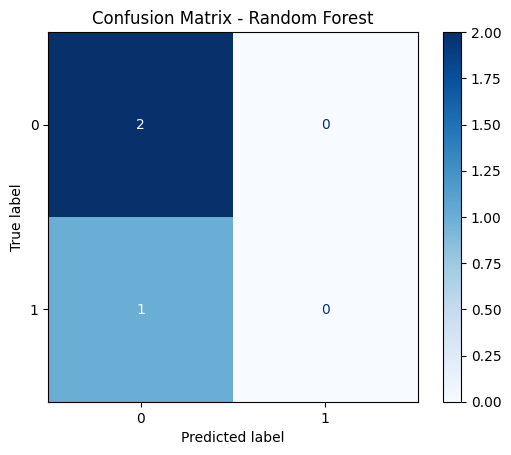

Gradient Boosting Accuracy: 1.0
Gradient Boosting ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



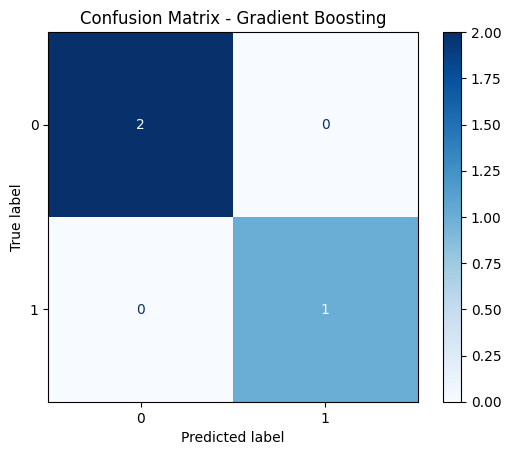

<ipython-input-11-cf9866c962bd>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


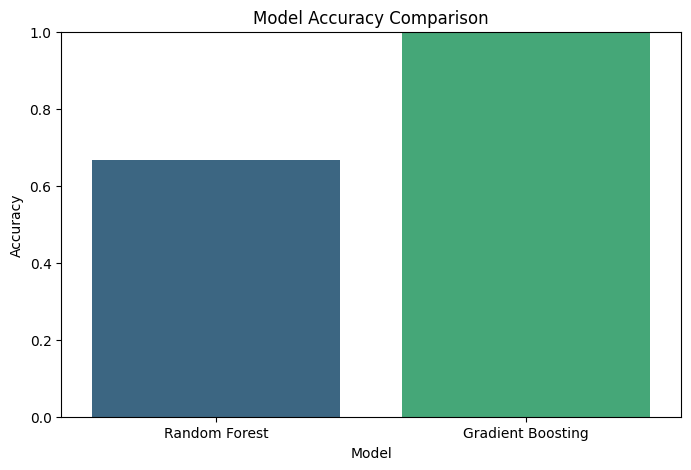

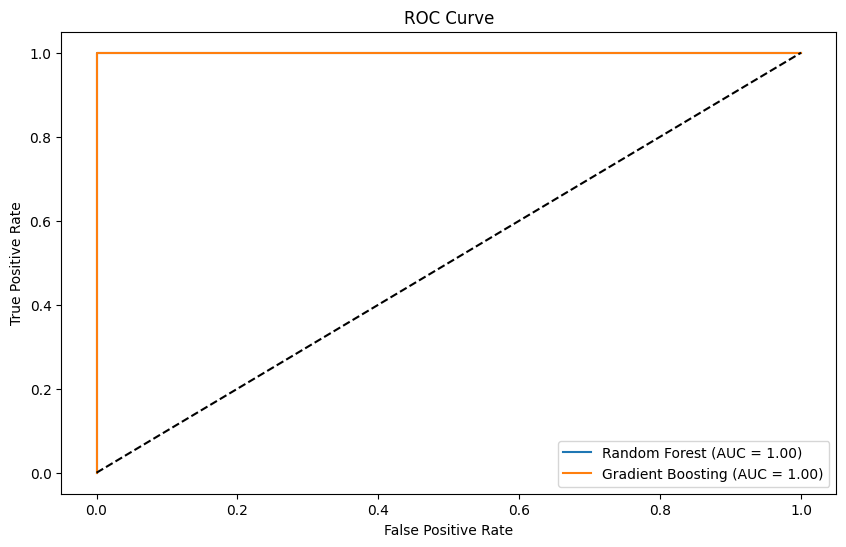

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('/content/credit_card_approval_optimized.csv')  # Replace with your dataset path

# Data Preprocessing
# Handle missing values
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split dataset into features (X) and target (y)
target_column = 'approval_status'  # Replace with the correct target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Data Visualization: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Check class distribution before SMOTE
class_distribution = Counter(y)
print("Class distribution before SMOTE:", class_distribution)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Adjust k_neighbors dynamically based on the minority class size
minority_class_size = min(class_distribution.values())
k_neighbors_value = max(1, minority_class_size - 1)  # Ensure k_neighbors >= 1

# Handle class imbalance using SMOTE
try:
    smote = SMOTE(k_neighbors=k_neighbors_value, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("Class distribution after SMOTE:", Counter(y_resampled))

    # Class distribution after SMOTE visualization
    resampled_class_distribution = Counter(y_resampled)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(resampled_class_distribution.keys()), y=list(resampled_class_distribution.values()))
    plt.title("Class Distribution After SMOTE")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

except ValueError as e:
    print("Error with SMOTE:", e)
    raise

# Split the resampled dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

accuracies = {}
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate accuracy and ROC-AUC
    acc = accuracy_score(y_test, y_pred)
    roc_auc = auc(*roc_curve(y_test, y_pred_proba)[:2])
    accuracies[name] = acc
    roc_auc_scores[name] = roc_auc

    print(f"{name} Accuracy: {acc}")
    print(f"{name} ROC-AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Visualize model accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Visualize ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()